## Final Project Submission

Details:
* Student name: ``Moses Thiong'o``
* Student pace: ``Part time``
* Scheduled project review date/time: ``July 24, 2023``
* Instructor name: ``Maryanne Mwikali``
* Blog post URL: *https://github.com/figmulberry/dsc-phase-one-project/tree/master*


`----------------------------------------------------------------------------`

## Introduction

Microsoft has a big repository of popular characters and franchises, but film and TV adaptations of its IP have been few and far between over the years. Recently, the company (Microsoft) has been thinking of venturing into producing original movies like the other well established big players in the industry. Following this, the team at Microsoft has contracted me as a specialist to undertake a reearch on how the movie producers in the market have been performing. As a lead `Data Scientist`, we will be exploring the types of films that have been doing the best at box office. We will help translate the findings into actionable insights that will guide the top-level management at Microsoft's new movie studio in what types of films to venture into.

## 1. Importing the Relevant Libraries needed to work with the dataset

In the cell below, the `csv`; `pandas` - aliased `pd`; `numpy` - aliased `np`; `json`; and `matplotlib`- aliased `plt` libraries have been imported.

In [46]:
# Importing the required libraries for working with the dataset
import csv; import pandas as pd; import json; import matplotlib.pyplot as plt; import numpy as np; import regex; import sqlite3; import seaborn as sns

# Using inline plotting where necessary
%matplotlib inline

## 2. Loading the Data into a DataFrame
In this section, the three datasets used for the project will be loaded into a DataFrame using pandas for further exploration. This enables us to read and see what columns and rows are present in the working dataset.

In [42]:
# Instantiating variables and loading the data to use for the project
imdb_title_basics = pd.read_csv("zippedData\\imdb.title.basics.csv\\title.basics.csv", index_col=0)
imdb_title_ratings = pd.read_csv("zippedData\\imdb.title.ratings.csv\\title.ratings.csv", index_col=0)
bom_movie_gross = pd.read_csv("zippedData\\bom.movie_gross.csv\\bom.movie_gross.csv", index_col=0)
tn_movie_budgets = pd.read_csv("zippedData\\tn.movie_budgets.csv\\tn.movie_budgets.csv", index_col=0)
im_db = "zippedData\\im.db\\im.db"

## 3. Further Exploration of the Datasets and Cleaning it for Analysis

In Section, we are Exploring the dataset to ensure that it is ready for analysis. 
* We shall check the data types
* Deal with Null values as best suited for the working dataset

In [24]:
# Loading the imdb_title_basics into a Data Frame and displaying the five first rows
imdb_title_basics.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [25]:
# How many records in imdb_title_basics
imdb_title_basics.shape

(146144, 5)

In [26]:
# Checking the info for imdb_title_basics
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


Note: The original_title, runtime_minutes, and genre columns have missing values.

In [27]:
# Loading the imdb_title_ratings into a Data Frame and displaying the five first rows
imdb_title_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [28]:
# Checking the records count in imdb_title_ratings
imdb_title_ratings.shape

(73856, 2)

In [29]:
# Checking the infor the imdb_title_ratings
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


Note: The data has all values

In [30]:
# Loading the bom_movie_gross into a Data Frame and displaying the five first rows
bom_movie_gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [31]:
# Checking the number of records in bom_movie_gross
bom_movie_gross.shape

(3387, 4)

In [32]:
# Exploring the info for bom_movie_gross
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


Note: The studio, domestic_gross, foreign_gross have some missing values. The foreign_gross field is captured as an object (str).

In [33]:
# Loading the tn_movie_budgets into a Data Frame and displaying the five first rows
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [34]:
# Checking the shape of the tn_movie_budgets
tn_movie_budgets.shape

(5782, 5)

In [35]:
# Looking at the info of the tn_movie_budgets
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [51]:
# Reading the in database table. We shall start by connecting to the database and print the tables present in the database
conn = sqlite3.connect(im_db)
tables_imdb = pd.read_sql("""SELECT name TableNames FROM sqlite_master WHERE type = 'table';""", conn)
tables_imdb


,TableNames
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


There are 8 tables in the im database. 

In [67]:
# Fetching the info for the movie_basics table
mvbasics = pd.read_sql("""SELECT * FROM movie_basics""", conn)
mvbasics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [68]:
# Reading the movie_ratings table
mvratings = pd.read_sql("""SELECT * FROM movie_ratings""", conn)
mvratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [69]:
# After checking the above tables, we shall then join them together in order to continue with the analysis
# mRatings_mBasics = pd.read_sql("""SELECT * FROM movie_basics JOIN movie_ratings USING(movie_id) LIMIT 10;""", conn)
mRatings_mBasics = mvbasics.join(mvratings.set_index('movie_id'), how='inner', on='movie_id', rsuffix='r')
mRatings_mBasics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [70]:
"""
Since we would like to join the bom_movie_gross with the mRatings_mBasics table, 
we will need to have the primary_title and title common and also the year
"""
mRatings_mBasics.rename(columns={'primary_title':'title'}, inplace=True)
mRatings_mBasics.rename(columns={'start_year':'year'}, inplace=True)
mRatings_mBasics

,movie_id,title,original_title,year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [71]:
# We will also drop some columns from the mRatings_mBasics that we won't be using for the analysis
mRatings_mBasics = mRatings_mBasics.drop(columns = ['original_title', 'runtime_minutes', 'numvotes'])
mRatings_mBasics

,movie_id,title,year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...,...
146115,tt9913084,Diabolik sono io,2019,Documentary,6.2
146122,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.7
146125,tt9914642,Albatross,2017,Documentary,8.5
146129,tt9914942,La vida sense la Sara Amat,2019,None,6.6


In [76]:
# We are now joining the mRatings-mBasics with bom_movie_gross table
mRatings_mBasics_bom_movie_gross = pd.merge(mRatings_mBasics, bom_movie_gross, on=['title', 'year'], how='inner')
mRatings_mBasics_bom_movie_gross

,movie_id,title,year,genres,averagerating,studio,domestic_gross,foreign_gross
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,Relbig.,1100000.0,NaN
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,8000000
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,129900000
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,26900000
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,"1,019.4"
...,...,...,...,...,...,...,...,...
1842,tt8290698,The Spy Gone North,2018,Drama,7.2,CJ,501000.0,NaN
1843,tt8404272,How Long Will I Love U,2018,Romance,6.5,WGUSA,747000.0,82100000
1844,tt8427036,Helicopter Eela,2018,Drama,5.4,Eros,72000.0,NaN
1845,tt9078374,Last Letter,2018,"Drama,Romance",6.4,CL,181000.0,NaN


In [74]:
# Dropping NaN values in the DataFrame
mRatings_mBasics_bom_movie_gross.dropna(inplace=True)

In [75]:
# Verifying the above code worked
mRatings_mBasics_bom_movie_gross

,movie_id,title,year,genres,averagerating,studio,domestic_gross,foreign_gross
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,8000000
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,129900000
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,26900000
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,"1,019.4"
5,tt0376136,The Rum Diary,2011,"Comedy,Drama",6.2,FD,13100000.0,10800000
...,...,...,...,...,...,...,...,...
1830,tt7784604,Hereditary,2018,"Drama,Horror,Mystery",7.3,A24,44100000.0,35300000
1836,tt7959026,The Mule,2018,"Crime,Drama,Thriller",7.1,WB,103800000.0,68700000
1838,tt8097306,Nobody's Fool,2018,"Comedy,Drama,Romance",4.6,Par.,31700000.0,1800000
1843,tt8404272,How Long Will I Love U,2018,Romance,6.5,WGUSA,747000.0,82100000


Note: This can be seen from the number of rows and columns

In [77]:
# Our focus is now on ensuring that the columns which will be used have the right dtypes
mRatings_mBasics_bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 1846
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        1847 non-null   object 
 1   title           1847 non-null   object 
 2   year            1847 non-null   int64  
 3   genres          1845 non-null   object 
 4   averagerating   1847 non-null   float64
 5   studio          1845 non-null   object 
 6   domestic_gross  1837 non-null   float64
 7   foreign_gross   1269 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 129.9+ KB


In [80]:
# Changing the foreign_policy column from a string to a float
mRatings_mBasics_bom_movie_gross['foreign_gross'] = pd.to_numeric(mRatings_mBasics_bom_movie_gross['foreign_gross'], errors='coerce')
mRatings_mBasics_bom_movie_gross.head()

,movie_id,title,year,genres,averagerating,studio,domestic_gross,foreign_gross
0,tt0315642,Wazir,2016,"Action,Crime,Drama",7.1,Relbig.,1100000.0,NaN
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,8000000.0
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,129900000.0
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,26900000.0
4,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,Uni.,652300000.0,NaN


In [81]:
# Dropping the Nan values in the foreign_gross column
mRatings_mBasics_bom_movie_gross.dropna(subset=['foreign_gross'], inplace=True)
mRatings_mBasics_bom_movie_gross.head()

,movie_id,title,year,genres,averagerating,studio,domestic_gross,foreign_gross
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,8000000.0
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,129900000.0
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,26900000.0
5,tt0376136,The Rum Diary,2011,"Comedy,Drama",6.2,FD,13100000.0,10800000.0
7,tt0383010,The Three Stooges,2012,"Comedy,Family",5.1,Fox,44300000.0,10500000.0


In [ ]:
# # Checking whether the column was set to the correct dtype
# mRatings_mBasics_bom_movie_gross.info()

In [ ]:
# # Closing the database connection after the transactions
# conn.close()

## 4. Research to Establish the patterns of the Movie Producers
We will undertake a research on how the top movie producers in the market have earned as Domestic and Foreign gross income from 2010 to 2018.

To start with:

* We shall also create a new column that will house the `total gross income` for both the domestic and foreign returns. We shall ensure to check the data types so that the sum can work correctly.
* We will also display the various statistics using different charts for this data.

In [84]:
# Creating a total gross income column which is a cumulative of two columns
mRatings_mBasics_bom_movie_gross['total_gross'] = mRatings_mBasics_bom_movie_gross['domestic_gross'] + mRatings_mBasics_bom_movie_gross['foreign_gross']
mRatings_mBasics_bom_movie_gross.head()

,movie_id,title,year,genres,averagerating,studio,domestic_gross,foreign_gross,total_gross
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,IFC,744000.0,8000000.0,8744000.0
2,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,Fox,58200000.0,129900000.0,188100000.0
3,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,Uni.,26300000.0,26900000.0,53200000.0
5,tt0376136,The Rum Diary,2011,"Comedy,Drama",6.2,FD,13100000.0,10800000.0,23900000.0
7,tt0383010,The Three Stooges,2012,"Comedy,Family",5.1,Fox,44300000.0,10500000.0,54800000.0


In [108]:
# In this section, we are making an expansion on the genres column since it has input values separated by ','
cExpansion = mRatings_mBasics_bom_movie_gross.assign(genres=mRatings_mBasics_bom_movie_gross["genres"].str.split(','))
cExpansion = cExpansion.explode("genres")
cExpansion.head(10)

,movie_id,title,year,genres,averagerating,studio,domestic_gross,foreign_gross,total_gross
1,tt0337692,On the Road,2012,Adventure,6.1,IFC,744000.0,8000000.0,8744000.0
1,tt0337692,On the Road,2012,Drama,6.1,IFC,744000.0,8000000.0,8744000.0
1,tt0337692,On the Road,2012,Romance,6.1,IFC,744000.0,8000000.0,8744000.0
2,tt0359950,The Secret Life of Walter Mitty,2013,Adventure,7.3,Fox,58200000.0,129900000.0,188100000.0
2,tt0359950,The Secret Life of Walter Mitty,2013,Comedy,7.3,Fox,58200000.0,129900000.0,188100000.0
2,tt0359950,The Secret Life of Walter Mitty,2013,Drama,7.3,Fox,58200000.0,129900000.0,188100000.0
3,tt0365907,A Walk Among the Tombstones,2014,Action,6.5,Uni.,26300000.0,26900000.0,53200000.0
3,tt0365907,A Walk Among the Tombstones,2014,Crime,6.5,Uni.,26300000.0,26900000.0,53200000.0
3,tt0365907,A Walk Among the Tombstones,2014,Drama,6.5,Uni.,26300000.0,26900000.0,53200000.0
5,tt0376136,The Rum Diary,2011,Comedy,6.2,FD,13100000.0,10800000.0,23900000.0


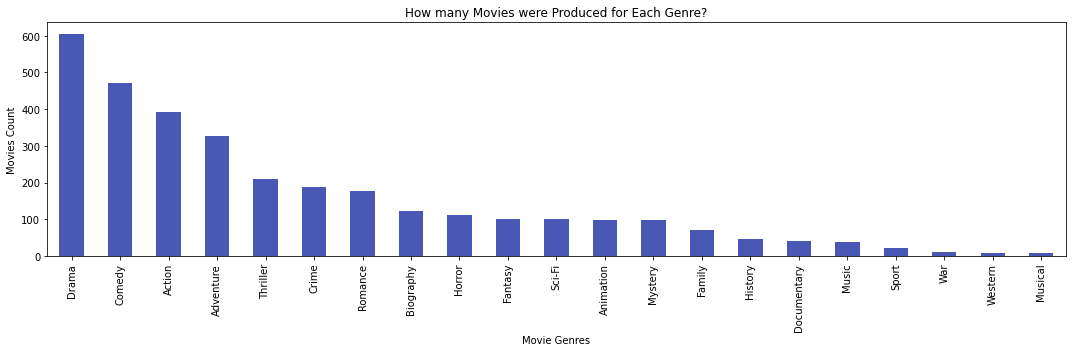

In [118]:
# Plotting the count of movies produced under each genre that was produced over time.
genres = mRatings_mBasics_bom_movie_gross['genres'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(15, 5))
genres.plot(kind='bar', color='#4958B5')
plt.xlabel("Movie Genres")v
plt.ylabel("Movies Count")
plt.title("How many Movies were Produced for Each Genre?")
plt.tight_layout()
plt.show()

Note: 
* From this, it can be observed that Drama genre movies were leading in production over time.
* The five leading genres in their order are: `Drama`, `Comedy`, `Action`, `Adventure`, and `Thriller` movies. 
* On the other hand, the five least produced movie genres were `Musical`, `Western`, `War`, `Sport`, and  `Music`. 
* This observation tells a critical story for Microsoft since it appears the audience was consuming some genres more than others. However, this tells a half-story. We will need to look at the total income for the various movie genres and determine which ones had the highest gross income.

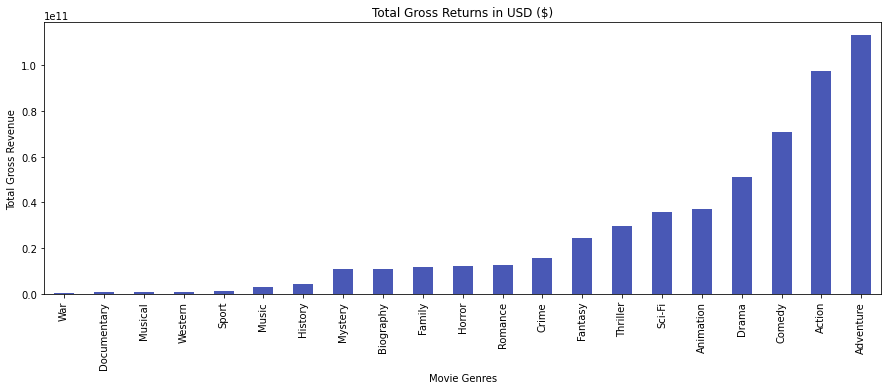

In [129]:
# Assuming you have a DataFrame named 'dataset' with columns 'genres' and 'gross_in_millions'

totalGross_for_genre = cExpansion.groupby("genres")['total_gross'].sum()

# horizontal bar graph to show total gross earnings per movie genre
plt.figure(figsize=(15, 5))
totalGross_for_genre.sort_values().plot(kind='bar', color='#4958B5')
plt.xlabel('Movie Genres')
plt.ylabel('Total Gross Revenue')
plt.title('Total Gross Returns in USD ($)')
plt.show()

Note:
* This observation now gives a consistent story.
* As seen above, the top five movie genres that fetched the highest gross returns from the highest were `Adventure`, `Action`, `Comedy`, `Drama`, and `Animations`.
* The five genres with the least total gross were `War`, `Documentary`, `Musical`, `Western`, and `Sport`.
* The story is very consistent and proves why most producers concentrated on certain genres and not others.

## 5. Conclusion

We have managed to clean the data in use and conduct analysis in order to assist Microsoft in delivering actionable recommendations that will see them start a movies production studio that is well-informed on how the past and current trends of other studios.

From this analysis, we have seen the least-performing genres in the market. This includes `War`, `Documentary`, `Musical`, `Western`, and `Sport`.

## 6. Recommendation

* Now that we have done quite some analysis in an effort to help Microsoft Corporation make a decision on which types of movies to produce in their studio, it is clear that they should focus more on movie genres such as `Adventure`, `Action`, `Comedy`, `Drama`, and `Animations` since they are the top most when their gross returns are looked at.
* The team should not only look at the local market but focus also on the global market to increase the gross net returns.
* With a keen emphasis on the above, it is highly possible that Microsoft will be among the top producers and sellers of their movies in their upcoming studio.